In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np
from MH_MCMC_Gaussian import *
import pandas as pd
from simulate_2CM import *

### An example

Text(0.5, 0, 'Time (minute)')

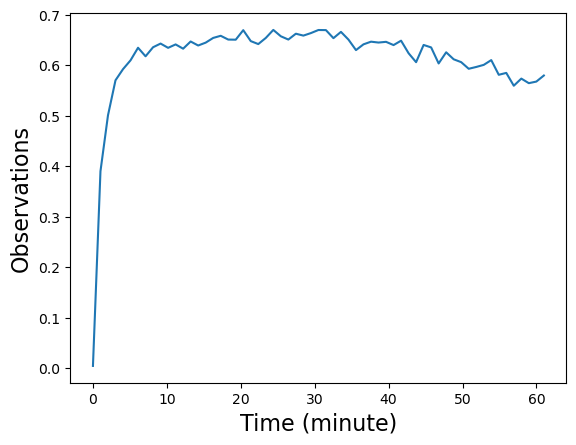

In [2]:
x = 0.17 , 0.18, 0.1, 0.1, 0.05, 0 
t, y = simulate_2CM(x)
sigma = 1e-2
y = y + np.random.normal(0, sigma, 61) # introduce gaussian noise
plt.plot(t, y)
plt.ylabel('Observations', fontsize=16)
plt.xlabel('Time (minute)', fontsize=16)
# plt.title('Noise level 2e-1', fontsize=16)
# plt.savefig('/Users/golfgti/Desktop/kkk.png')

In [3]:
# Settings
num_samples = 1000000  # Total number of MCMC samples

# Define parameter bounds (min, max) for each parameter
param_bounds = [(0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (1e-8, 0.2)]

# Initial guess for the parameters, uniformly sampled within bounds
initial_x = np.array([np.random.uniform(low, high) for low, high in param_bounds])
initial_x[-1] = sigma

# Run MH-MCMC
proposal_std = [0.04, 0.04, 0.04, 0.04, 0.04, 0.0]  # Standard deviation of the proposal distribution (adjust as needed)
target_acceptance = 0.44
samples = metropolis_hastings(initial_x, y, num_samples, proposal_std, target_acceptance)

  0%|                                               | 0/1000000 [00:00<?, ?it/s]/Users/golfgti/Desktop/Yun_simulation_data/MH_MCMC_Gaussian.py:31: RuntimeWarning: divide by zero encountered in log
  theta = np.log(proposal_std)
/Users/golfgti/Desktop/Yun_simulation_data/MH_MCMC_Gaussian.py:59: RuntimeWarning: overflow encountered in exp
  acceptance_probability = min(1, np.exp(log_acceptance_ratio))
  2%|▊                                | 24224/1000000 [00:18<12:12, 1332.00it/s]


KeyboardInterrupt: 

Text(0.5, 102.72222222222219, '# steps')

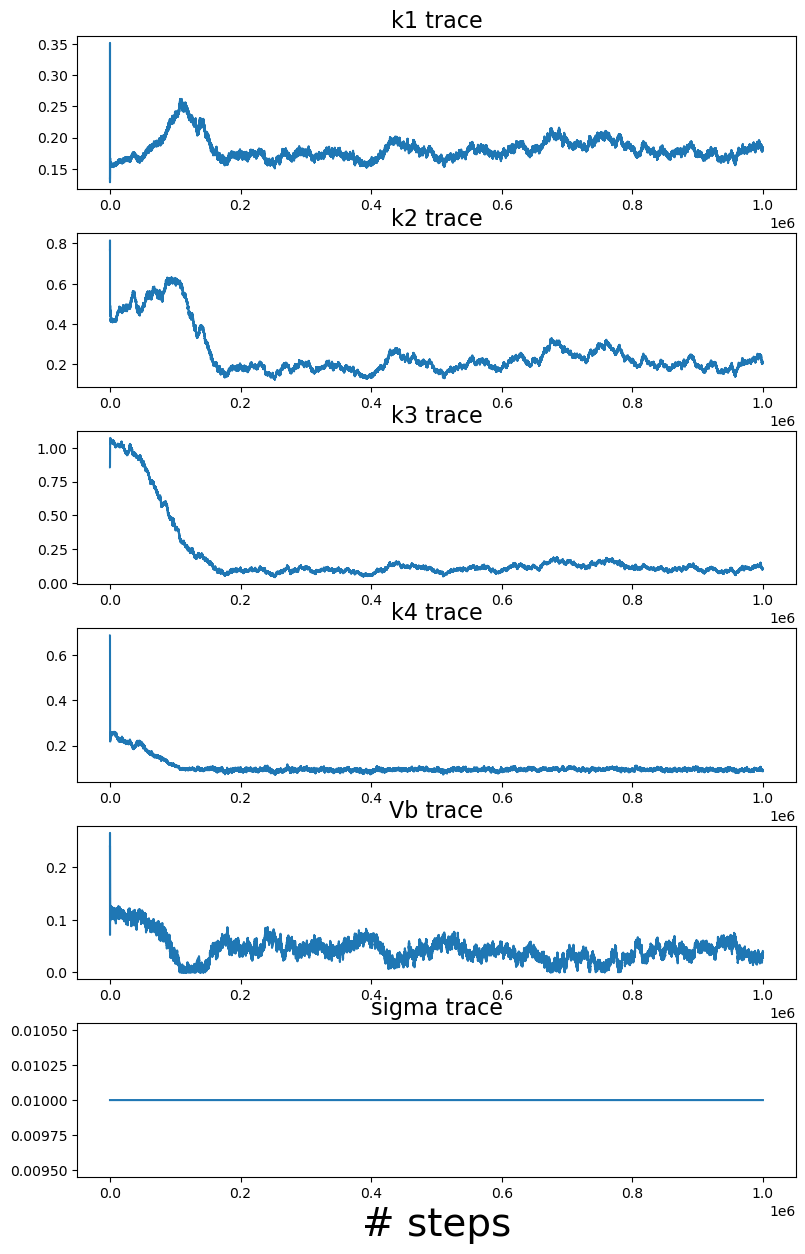

In [22]:
# Show parameters estimates trace plots
fig, ax = plt.subplots(6, 1, figsize=(8,12))
fig.tight_layout()

samples = np.array(samples)
ax[0].plot(samples[:,0])
ax[0].set_title('k1 trace', fontsize = 16)
ax[1].plot(samples[:,1])
ax[1].set_title('k2 trace', fontsize = 16)
ax[2].plot(samples[:,2])
ax[2].set_title('k3 trace', fontsize = 16)
ax[3].plot(samples[:,3])
ax[3].set_title('k4 trace', fontsize = 16)
ax[4].plot(samples[:,4])
ax[4].set_title('Vb trace', fontsize = 16)
ax[5].plot(samples[:,5])
ax[5].set_title('sigma trace', fontsize = 16)
ax[5].set_xlabel('# steps', fontsize = 28)

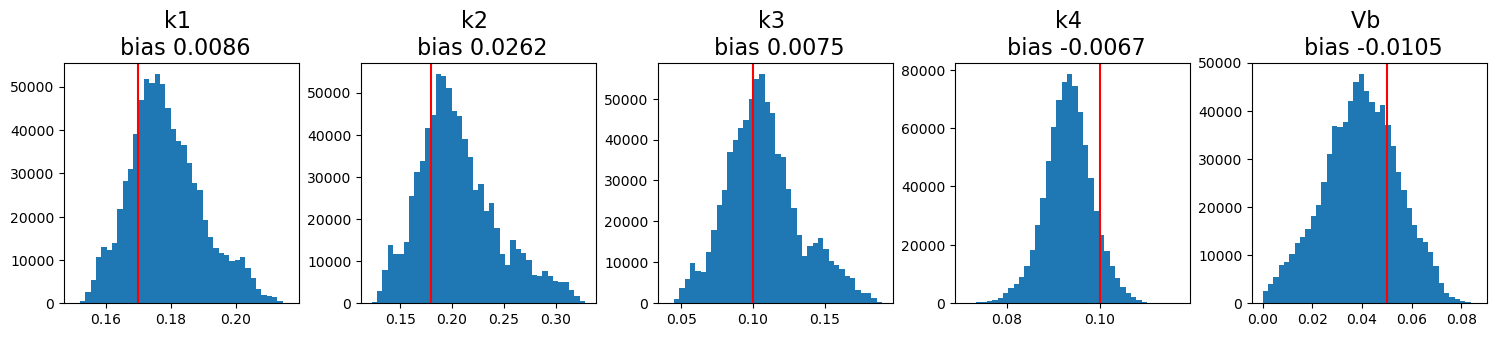

In [24]:
# Histogram
burnin = 200000
fig, ax = plt.subplots(1, 5, figsize=(15,3))
fig.tight_layout()

ax[0].hist(samples[burnin:, 0],40)
ax[0].set_title('k1 \n bias {:.4f}'.format(np.mean(samples[burnin:, 0])-x[0]), fontsize = 16)
ax[0].axvline(x[0], color='red')
ax[0].ticklabel_format(useOffset=False, style='plain')
ax[1].hist(samples[burnin:, 1],40)
ax[1].set_title('k2 \n bias {:.4f}'.format(np.mean(samples[burnin:, 1])-x[1]), fontsize = 16)
ax[1].axvline(x[1], color='red')
ax[2].hist(samples[burnin:, 2],40)
ax[2].set_title('k3 \n bias {:.4f}'.format(np.mean(samples[burnin:, 2])-x[2]), fontsize = 16)
ax[2].axvline(x[2], color='red')
ax[3].hist(samples[burnin:, 3],40)
ax[3].set_title('k4 \n bias {:.4f}'.format(np.mean(samples[burnin:, 3])-x[3]), fontsize = 16)
ax[3].axvline(x[3], color='red')
ax[4].hist(samples[burnin:, 4],40)
ax[4].set_title('Vb \n bias {:.4f}'.format(np.mean(samples[burnin:, 4])-x[4]), fontsize = 16)
ax[4].axvline(x[4], color='red')
# fig.savefig('/Users/golfgti/Desktop/Presentation/MH-MCMC_noiselevel1_estimation.png',bbox_inches = 'tight')